<a href="https://colab.research.google.com/github/LiuYiShan613/EDA/blob/main/item2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# !!!!後續在相關函式中增加fontproperties=myfont屬性即可!!!!

--2022-01-04 06:47:41--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.2.110, 2607:f8b0:4004:80a::200e
Connecting to drive.google.com (drive.google.com)|172.217.2.110|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v6ccv4f9r71n60rrltqrfou330uf68ua/1641278850000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-01-04 06:47:42--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v6ccv4f9r71n60rrltqrfou330uf68ua/1641278850000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.217.1.193, 2607:f8b0:4004:801::2001
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|172.217.1.193|:443

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x:'%.0f'% x)

data = pd.read_csv('/content/drive/MyDrive/data/data3_project.csv')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8,2019-01-01,1259,9100002488768,中區,2019-12-09,2018-06-24
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8,2019-01-01,839,9100002556566,中區,2018-10-21,2018-10-21
2,PS5335020955,BJ102,檸檬精油10ml MUI,8,2019-01-01,839,9100002556566,中區,2018-10-21,2018-10-21
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8,2019-01-01,-1501,9100002556566,中區,2018-10-21,2018-10-21
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8,2019-01-01,672,9100002582077,南區,2018-12-04,2018-12-04
...,...,...,...,...,...,...,...,...,...,...
1404430,PS5324024941,KQ02,玫瑰晶萃活膚液130ml,16,2020-12-31,2946,9100000595826,中區,2010-03-15,2012-07-11
1404431,PS5219002027,GAXFG1,真正除臭抗菌噴霧(銀離子迷迭香)250ml,8,2020-12-31,309,9100003028369,竹區,2020-12-08,2020-11-26
1404432,PS5219002027,MAB2G1,BA-5肌密全效噴霧奇蹟水70ml,8,2020-12-31,1094,9100003028369,竹區,2020-12-08,2020-11-26
1404433,PS5219002027,WD096,緊緻保濕裸膚羽翼面膜25ml-零售單包,16,2020-12-31,165,9100003028369,竹區,2020-12-08,2020-11-26


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404435 entries, 0 to 1404434
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   InvoiceNo          1404435 non-null  object 
 1   StockCode          1404435 non-null  object 
 2   Description        1404435 non-null  object 
 3   Quantity           1404435 non-null  float64
 4   InvoiceDate        1404435 non-null  object 
 5   UnitPrice          1404435 non-null  float64
 6   CustomerID         1403724 non-null  float64
 7   Country            1404435 non-null  object 
 8   member_start_date  1366651 non-null  object 
 9   first_trans_date   1400412 non-null  object 
dtypes: float64(3), object(7)
memory usage: 107.2+ MB


In [ ]:
data.isnull().any()

InvoiceNo            False
StockCode            False
Description          False
Quantity             False
InvoiceDate          False
UnitPrice            False
CustomerID            True
Country              False
member_start_date     True
first_trans_date      True
dtype: bool

In [ ]:
data.drop(data[data['CustomerID'].isnull()].index,inplace=True)

In [ ]:
data.isnull().any()

InvoiceNo            False
StockCode            False
Description          False
Quantity             False
InvoiceDate          False
UnitPrice            False
CustomerID           False
Country              False
member_start_date     True
first_trans_date      True
dtype: bool

In [ ]:
# 會員兩年內所購買的所有東西
df_group = data.groupby(['CustomerID'])['Description'].apply(lambda x: ' '.join([str(m) for m in x])).reset_index()
df_group.head()

,CustomerID,Description
0,9100000000061,24H賦活液100ml 玫瑰晶萃瞬效霜30ml 超防禦UV潤色妝前乳30ml 旗艦無壓力頭S...
1,9100000000085,五日激光煥顏課程單堂 膠原晶球水導膜課程單堂 苦杏仁酸靚顏慕絲300ml 旗艦全背順氣活力S...
2,9100000000092,超導水網瞬效面膜26ml*6包 24小時黃金璀璨賦活液40ml 玫瑰晶萃露15ml 玫瑰晶萃...
3,9100000000115,玫瑰晶萃水面膜10ml*10支 DC原生龍血素30ml 阿甘髮膜1000ml 阿甘洗髮精10...
4,9100000000170,旗艦全背順氣活力SPA課程2.0單堂 世界花園旅行組(黑)


In [ ]:
df_group.to_csv('/content/drive/MyDrive/data/itemlens_uid_itemids.csv', index=False)

# Use Pyspark train item2vec

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jre-headless_8u292-b10-0ubuntu1~18.04_amd64.deb  404  Not Found [IP: 91.189.88.152 80]
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jdk-headless_8u292-b10-0ubuntu1~18.04_amd64.deb  404  Not Found [IP: 91.189.88.152 80]
E: Unable to fetch some archives, maybe run apt-get update or try with --fix-missing?


In [ ]:
! pip install pyspark
! pip install findspark

In [ ]:
#初始化spark
import findspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("PySpark Item2vec").getOrCreate()

sc = spark.sparkContext

In [ ]:
df = spark.read.csv('/content/drive/MyDrive/data/itemlens_uid_itemids.csv', header=True)
df.show(5)

+---------------+------------------------------------+
|     CustomerID|                         Description|
+---------------+------------------------------------+
|9100000000061.0|        24H賦活液100ml 玫瑰晶萃瞬...|
|9100000000085.0|五日激光煥顏課程單堂 膠原晶球水導...|
|9100000000092.0|       超導水網瞬效面膜26ml*6包 2...|
|9100000000115.0|        玫瑰晶萃水面膜10ml*10支 D...|
|9100000000170.0|     旗艦全背順氣活力SPA課程2.0單...|
+---------------+------------------------------------+
only showing top 5 rows



In [ ]:
from pyspark.sql import functions as F
from pyspark.sql import types as T

#把字符串格是變成list
df = df.withColumn('Description', F.split(df.Description, " "))

In [ ]:
df.show()

+---------------+----------------------------------+
|     CustomerID|                       Description|
+---------------+----------------------------------+
|9100000000061.0|        [24H賦活液100ml, 玫瑰晶...|
|9100000000085.0|[五日激光煥顏課程單堂, 膠原晶球...|
|9100000000092.0|     [超導水網瞬效面膜26ml*6包,...|
|9100000000115.0|      [玫瑰晶萃水面膜10ml*10支,...|
|9100000000170.0|    [旗艦全背順氣活力SPA課程2.0...|
|9100000000214.0|     [花漾美體淨白乳60ml-贈品, ...|
|9100000000221.0|  [旗艦全身健康優化SPA課程單堂,...|
|9100000000238.0|   [旗艦無壓力頭SPA課程單堂, 花...|
|9100000000245.0|[手部甘皮硬皮處理單堂, 手部單色...|
|9100000000252.0|         [花漾美體淨白乳60ml-贈品]|
|9100000000269.0|   [工本費, 無壓力頭SPA課程單堂...|
|9100000000283.0|   [防曬袖套(橘)寬版L, 玫瑰晶萃...|
|9100000000306.0|  [旗艦全身健康優化SPA課程單堂,...|
|9100000000337.0|[旗艦太極磁氧靚顏課程單堂, 光速...|
|9100000000351.0|[旗艦全效淨化循環調理課程單堂, ...|
|9100000000382.0|  [旗艦全身健康優化SPA課程單堂,...|
|9100000000399.0|[旗艦太極磁氧靚顏課程單堂, 旗艦...|
|9100000000412.0|[旗艦腸道淨化課程單堂, 精油香氛...|
|9100000000429.0| [激活更新護理_臉部刮痧單堂, 激...|
|9100000000436.0|     [plus5智頻美塑儀課程單堂, ...|
+------

# 實現word(item)2vec的訓練與轉換

In [ ]:
from pyspark.ml.feature import Word2Vec

word2Vec = Word2Vec(vectorSize=5, minCount=0, inputCol="Description", outputCol="Stock_2vec")

model = word2Vec.fit(df)

In [ ]:
# 不計算每個user的embedding，而是計算item的embedding
model.getVectors().show(3, truncate=False)

+------------------------------+------------------------------------------------------------------------------------------------------------+
|word                          |vector                                                                                                      |
+------------------------------+------------------------------------------------------------------------------------------------------------+
|激活更新護理_臉部溫灸單堂     |[-0.13217678666114807,0.6557527780532837,-0.994597852230072,-1.3656237125396729,-0.23289452493190765]       |
|2017MOMO購物網背部舒壓樂活課程|[0.014832557179033756,-0.04232446104288101,-0.06498946249485016,-0.009915538132190704,-0.042291026562452316]|
|(3.0                          |[0.1297091692686081,0.8376424312591553,-0.2950323224067688,0.35099637508392334,-1.7761447429656982]         |
+------------------------------+------------------------------------------------------------------------------------------------------------+
only showing top 3 rows



/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [ ]:
model.getVectors().select("word", "vector").toPandas().to_csv('/content/drive/MyDrive/data/stocklens_stock_embeddind.csv', index=True)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [ ]:
model.getVectors().show(truncate=False)

+----------------------------------------+------------------------------------------------------------------------------------------------------------+
|word                                    |vector                                                                                                      |
+----------------------------------------+------------------------------------------------------------------------------------------------------------+
|激活更新護理_臉部溫灸單堂               |[-0.13217678666114807,0.6557527780532837,-0.994597852230072,-1.3656237125396729,-0.23289452493190765]       |
|2017MOMO購物網背部舒壓樂活課程          |[0.014832557179033756,-0.04232446104288101,-0.06498946249485016,-0.009915538132190704,-0.042291026562452316]|
|(3.0                                    |[0.1297091692686081,0.8376424312591553,-0.2950323224067688,0.35099637508392334,-1.7761447429656982]         |
|粹白茉莉柔嫩護手霜30g                   |[0.05209317058324814,-0.04914732649922371,-0.3068632483482361,-0.1000619456171

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [ ]:
#轉成numpy型態
word = model.getVectors().select("word")
word = np.array(word.select('word').collect())
#轉成一維
word = word.reshape(-1)

item_v = model.getVectors().select("vector")
item_v = np.array(item_v.select('vector').collect())

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [ ]:
word.shape

(866,)

In [ ]:
item_v.shape

(866, 1, 5)

In [ ]:
item_v

array([[[-0.13217679,  0.65575278, -0.99459785, -1.36562371,
         -0.23289452]],

       [[ 0.01483256, -0.04232446, -0.06498946, -0.00991554,
         -0.04229103]],

       [[ 0.12970917,  0.83764243, -0.29503232,  0.35099638,
         -1.77614474]],

       ...,

       [[-0.43215567, -0.48839048, -0.00768838, -0.3192248 ,
          0.02886074]],

       [[-0.25896263, -0.34618893, -0.7821247 , -0.15268598,
          0.32794884]],

       [[-0.0980797 ,  0.0675355 ,  0.06626571, -0.09879957,
          0.06946416]]])

In [ ]:
item_v=item_v.reshape(866,5) #後面做t-SNE視覺化只限定用二維資料

# t-SNE視覺化

In [ ]:
from sklearn import manifold
#t-SNE
X_tsne = manifold.TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(item_v)

#data Visualization 
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min) #normalize

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 866 samples in 0.001s...
[t-SNE] Computed neighbors for 866 samples in 0.054s...
[t-SNE] Computed conditional probabilities for sample 866 / 866
[t-SNE] Mean sigma: 0.128984
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.949753
[t-SNE] KL divergence after 1000 iterations: 0.657411


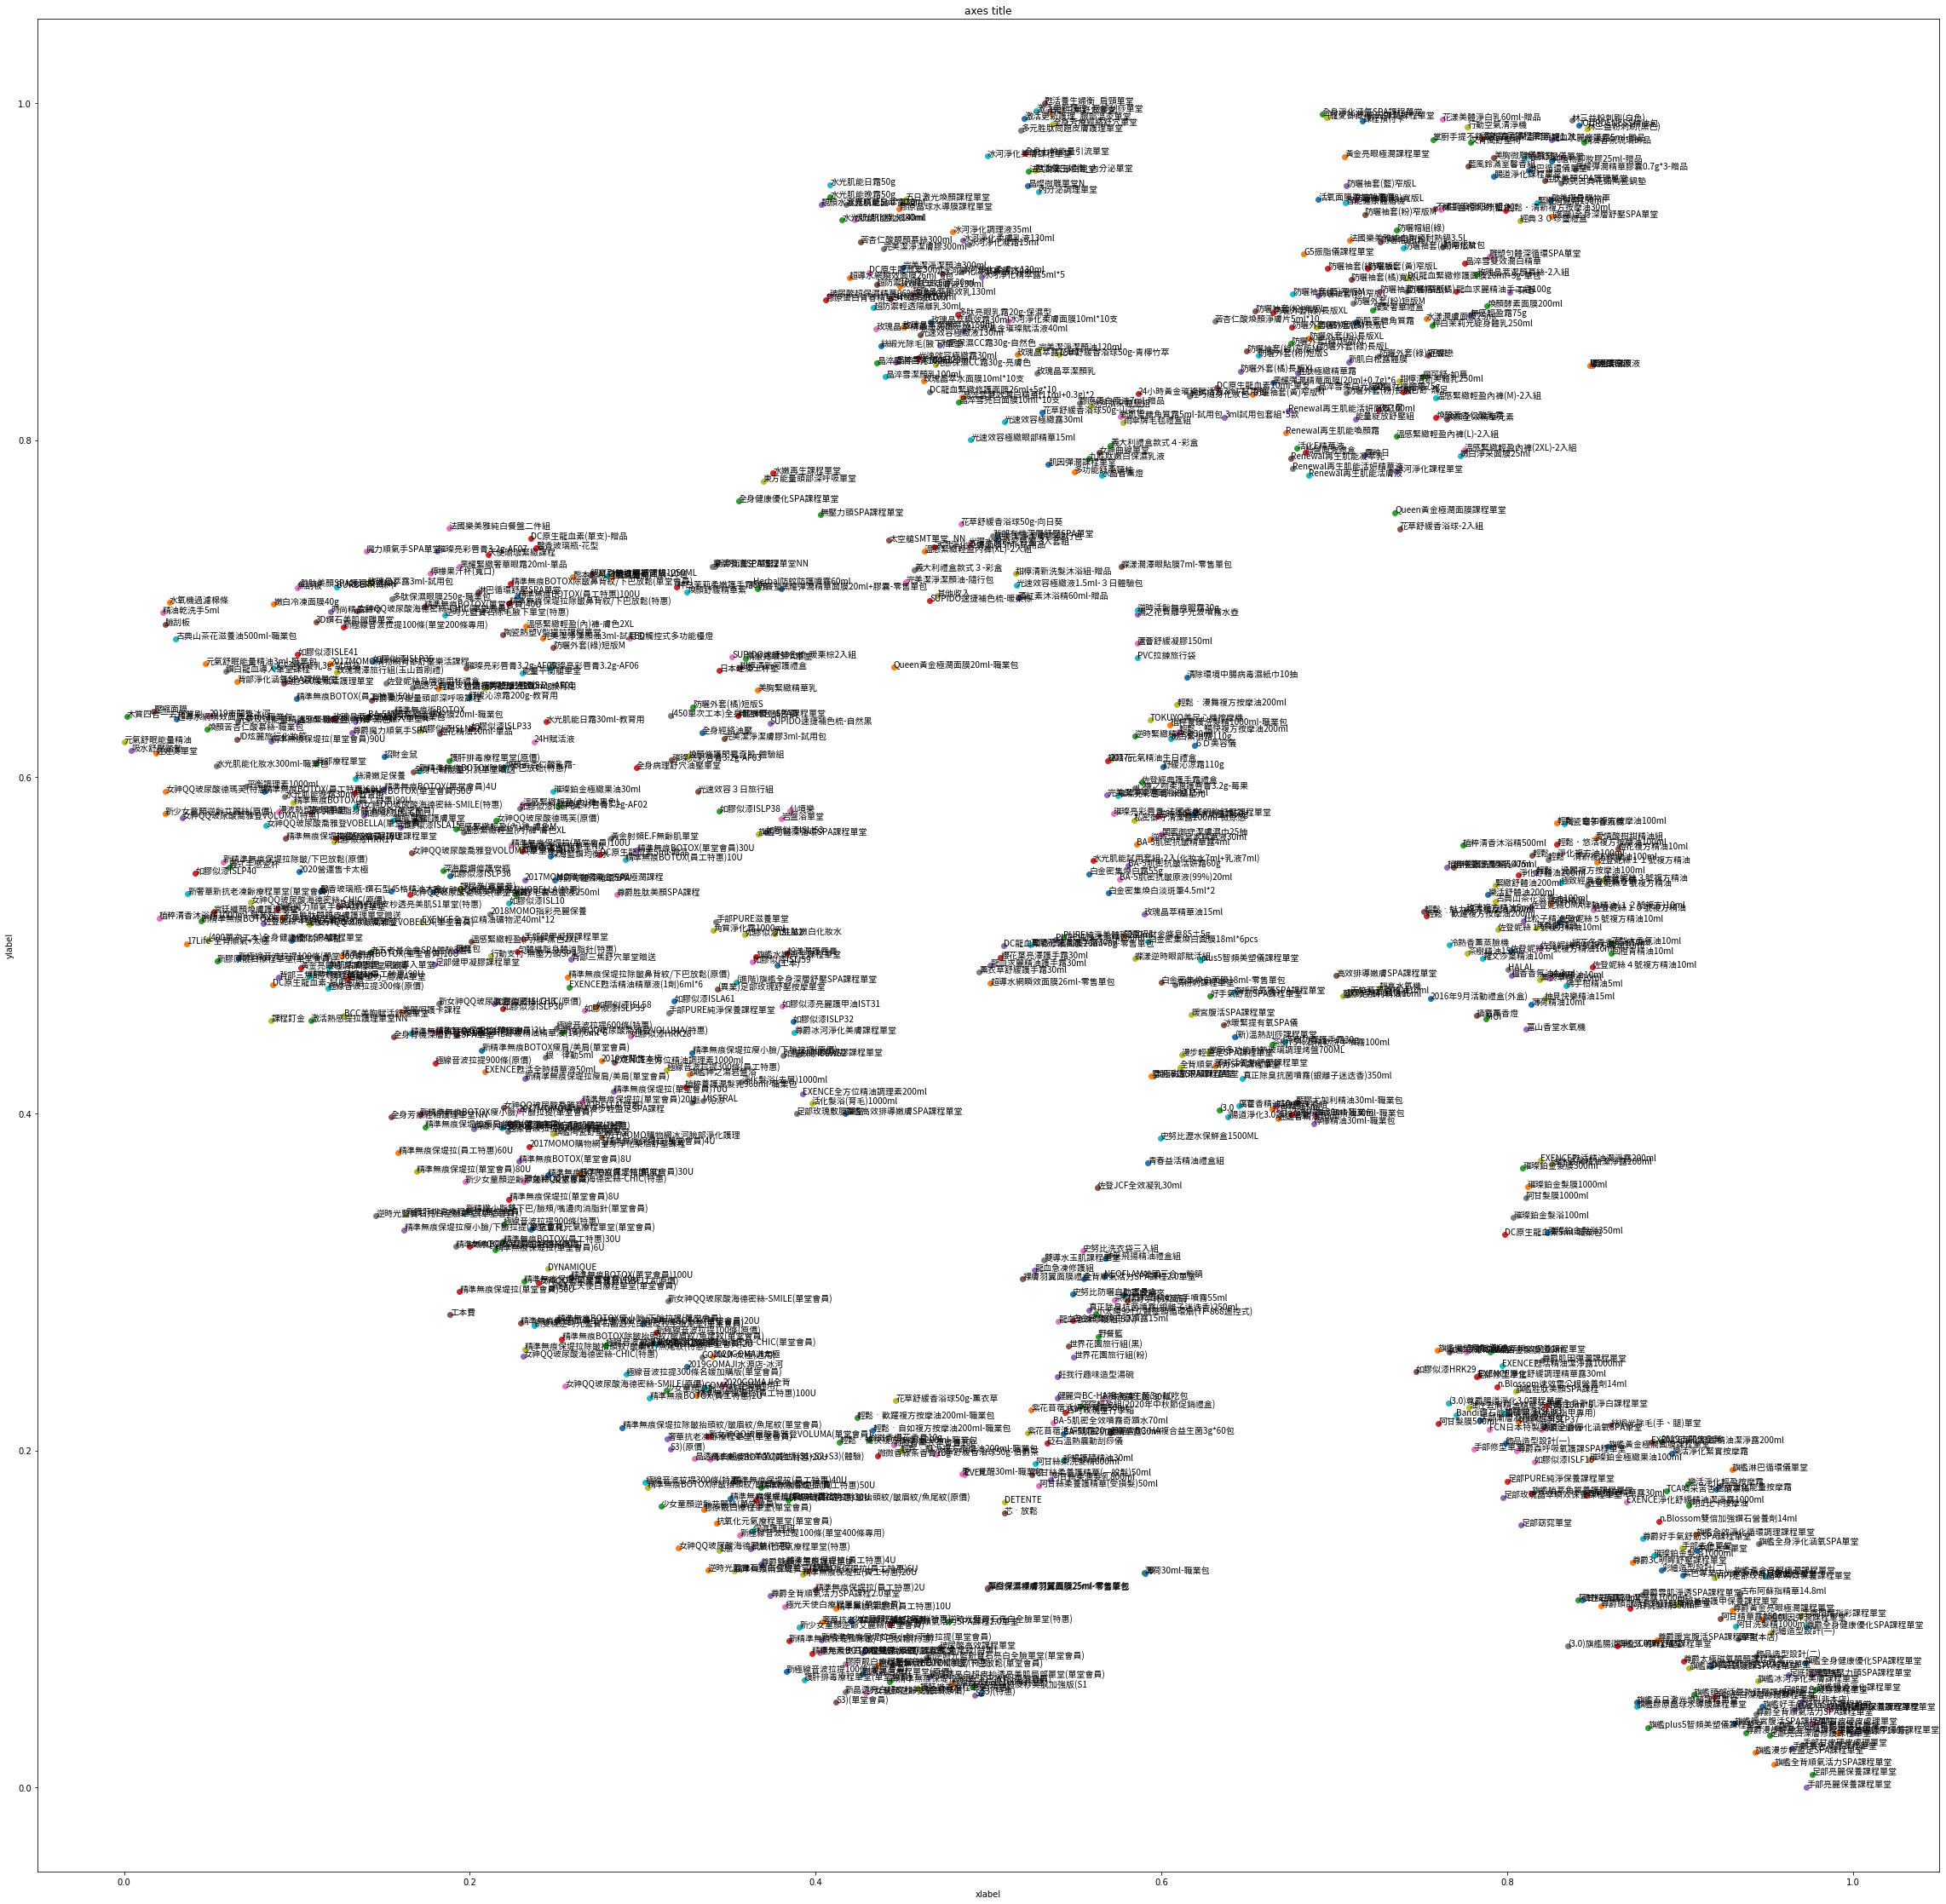

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot()
for i in range(X_norm.shape[0]):
  ax.scatter(X_norm[i,0], X_norm[i,1])
  ax.annotate(word[i], (X_norm[i,0], X_norm[i,1]), fontproperties=myfont)

ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

plt.show()